


# **CPE019 - Neural Networks**

---


**Name:** QUEJADO,  Jimlord M. <br>
**Course and Section:** CPE019-CPE32S3 <br>
**Date of Submission**: April 2, 2024<br>
**Instructor:** Engr. Roman Richard<br>

---




# Activity 1.1 : Neural Networks

#### Objective(s):

This activity aims to demonstrate the concepts of neural networks

#### Intended Learning Outcomes (ILOs):
* Demonstrate how to use activation function in neural networks
* Demonstrate how to apply feedforward and backpropagation in neural networks


#### Resources:
* Jupyter Notebook


#### Procedure:

Import the libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Define and plot an activation function

### Sigmoid function:

$$
\sigma = \frac{1}{1 + e^{-x}}
$$

$\sigma$ ranges from (0, 1). When the input $x$ is negative, $\sigma$ is close to 0. When $x$ is positive, $\sigma$ is close to 1. At $x=0$, $\sigma=0.5$

In [ ]:
## create a sigmoid function
def sigmoid(x):
    """Sigmoid function"""
    return 1.0 / (1.0 + np.exp(-x))

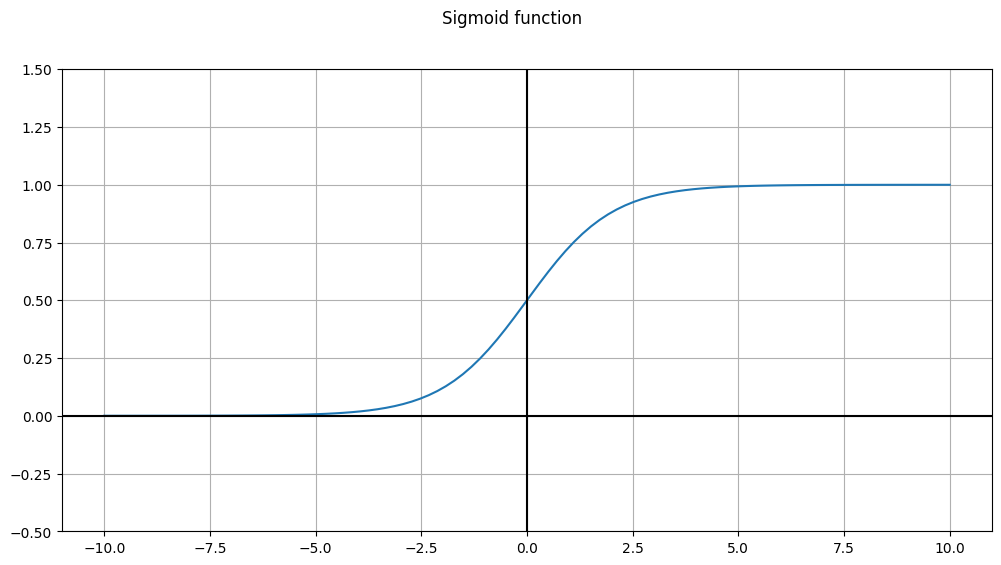

In [ ]:
# Plot the sigmoid function
vals = np.linspace(-10, 10, num=100, dtype=np.float32)
activation = sigmoid(vals)
fig = plt.figure(figsize=(12,6))
fig.suptitle('Sigmoid function')
plt.plot(vals, activation)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.yticks()
plt.ylim([-0.5, 1.5]);

Choose any activation function and create a method to define that function.

### ReLu Function

The chosen activation function of this code is rectified linear units (ReLu). ReLu is the most commonly used activation function where the main advantage is that it does not activate all the neurons at the same time [1].


---
Reference: <br>
[1] GfG, “Activation functions,” GeeksforGeeks, Aug. 23, 2019. https://www.geeksforgeeks.org/activation-functions/ <br>
[2] J. Brownlee, “A gentle introduction to the rectified Linear Unit (RELU),” MachineLearningMastery.com, Aug. 20, 2020. https://machinelearningmastery.com/rectified-linear-activation-function-for-deep-learning-neural-networks/

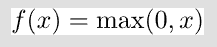

In [ ]:
def ReLu(x):
  return max(0,x)


Plot the activation function

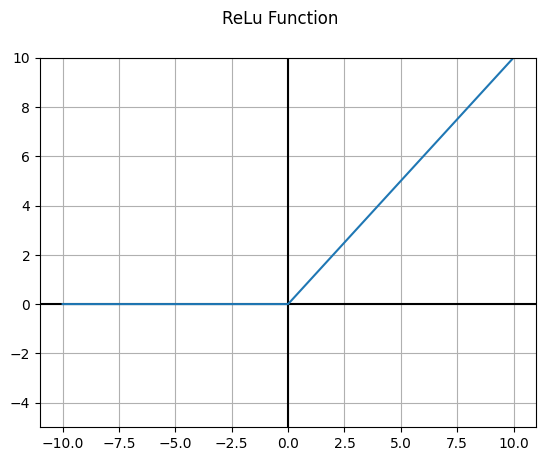

In [ ]:
# Plot the sigmoid function

#preparing the input series
input = [x for x in range(-10, 11)]
# calculate outputs for our inputs
output = [ReLu(x) for x in input]


#creating the visualization
plt.suptitle('ReLu Function')
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.ylim([-5, 10]);

#plotting
plt.plot(input, output)

plt.show()

<Font Color  = 'Green'> **Observation:**

In this section, I was able create a ReLu Function with the help of the formula that was provided in the internet. Additionally, I was also able to learn new commands about the pyplot where in adding grids and axis lines for better visualization.

### Neurons as boolean logic gates



### OR Gate

<table>

<tr>
<th colspan="3">OR gate truth table</th>
</tr>

<tr>
<th colspan="2">Input</th>
<th>Output</th>
</tr>

<tr>
<td>0</td>
<td>0</td>
<td>0</td>
</tr>

<tr>
<td>0</td>
<td>1</td>
<td>1</td>
</tr>

<tr>
<td>1</td>
<td>0</td>
<td>1</td>
</tr>

<tr>
<td>1</td>
<td>1</td>
<td>1</td>
</tr>

</table>

A neuron that uses the sigmoid activation function outputs a value between (0, 1). This naturally leads us to think about boolean values.



By limiting the inputs of $x_1$ and $x_2$ to be in $\left\{0, 1\right\}$, we can simulate the effect of logic gates with our neuron. The goal is to find the weights , such that it returns an output close to 0 or 1 depending on the inputs.

What numbers for the weights would we need to fill in for this gate to output OR logic? Observe from the plot above that $\sigma(z)$ is close to 0 when $z$ is largely negative (around -10 or less), and is close to 1 when $z$ is largely positive (around +10 or greater).

$$
z = w_1 x_1 + w_2 x_2 + b
$$

Let's think this through:

* When $x_1$ and $x_2$ are both 0, the only value affecting $z$ is $b$. Because we want the result for (0, 0) to be close to zero, $b$ should be negative (at least -10)
* If either $x_1$ or $x_2$ is 1, we want the output to be close to 1. That means the weights associated with $x_1$ and $x_2$ should be enough to offset $b$ to the point of causing $z$ to be at least 10.
* Let's give $b$ a value of -10. How big do we need $w_1$ and $w_2$ to be?
    * At least +20
* So let's try out $w_1=20$, $w_2=20$, and $b=-10$!

In [ ]:
def logic_gate(w1, w2, b):
    # Helper to create logic gate functions
    # Plug in values for weight_a, weight_b, and bias
    return lambda x1, x2: sigmoid(w1 * x1 + w2 * x2 + b)

def test(gate):
    # Helper function to test out our weight functions.
    for a, b in (0, 0), (0, 1), (1, 0), (1, 1):
        print("{}, {}: {}".format(a, b, np.round(gate(a, b))))

In [ ]:
or_gate = logic_gate(20, 20, -10)
test(or_gate)

0, 0: 0.0
0, 1: 1.0
1, 0: 1.0
1, 1: 1.0


<table>

<tr>
<th colspan="3">OR gate truth table</th>
</tr>

<tr>
<th colspan="2">Input</th>
<th>Output</th>
</tr>

<tr>
<td>0</td>
<td>0</td>
<td>0</td>
</tr>

<tr>
<td>0</td>
<td>1</td>
<td>1</td>
</tr>

<tr>
<td>1</td>
<td>0</td>
<td>1</td>
</tr>

<tr>
<td>1</td>
<td>1</td>
<td>1</td>
</tr>

</table>

Try finding the appropriate weight values for each truth table.

### AND Gate

<table>

<tr>
<th colspan="3">AND gate truth table</th>
</tr>

<tr>
<th colspan="2">Input</th>
<th>Output</th>
</tr>

<tr>
<td>0</td>
<td>0</td>
<td>0</td>
</tr>

<tr>
<td>0</td>
<td>1</td>
<td>0</td>
</tr>

<tr>
<td>1</td>
<td>0</td>
<td>0</td>
</tr>

<tr>
<td>1</td>
<td>1</td>
<td>1</td>
</tr>

</table>


Try to figure out what values for the neurons would make this function as an AND gate.

In [ ]:
# Fill in the w1, w2, and b parameters such that the truth table matches
w1 = 1
w2 = 1
b = -1
and_gate = logic_gate(w1, w2, b)

test(and_gate)

0, 0: 0.0
0, 1: 0.0
1, 0: 0.0
1, 1: 1.0


Do the same for the NOR gate and the NAND gate.

In [ ]:
w1 = -1
w2 = -1
b = 1
nor_gate = logic_gate(w1, w2, b)

test(nor_gate)

0, 0: 1.0
0, 1: 0.0
1, 0: 0.0
1, 1: 0.0


In [ ]:
w1 = -1
w2 = -1
b =  2
nand_gate = logic_gate(w1, w2, b)

test(nand_gate)

0, 0: 1.0
0, 1: 1.0
1, 0: 1.0
1, 1: 0.0


## Limitation of single neuron

 Here's the truth table for XOR:

### XOR (Exclusive Or) Gate

<table>

<tr>
<th colspan="3">XOR gate truth table</th>
</tr>

<tr>
<th colspan="2">Input</th>
<th>Output</th>
</tr>

<tr>
<td>0</td>
<td>0</td>
<td>0</td>
</tr>

<tr>
<td>0</td>
<td>1</td>
<td>1</td>
</tr>

<tr>
<td>1</td>
<td>0</td>
<td>1</td>
</tr>

<tr>
<td>1</td>
<td>1</td>
<td>0</td>
</tr>

</table>

Now the question is, can you create a set of weights such that a single neuron can output this property?

It turns out that you cannot. Single neurons can't correlate inputs, so it's just confused. So individual neurons are out. Can we still use neurons to somehow form an XOR gate?


In [ ]:
# Make sure you have or_gate, nand_gate, and and_gate working from above!
def xor_gate(a, b):
    c = or_gate(a, b)
    d = nand_gate(a, b)
    return and_gate(c, d)
test(xor_gate)

0, 0: 0.0
0, 1: 1.0
1, 0: 1.0
1, 1: 1.0


# Feedforward Networks

The feed-forward computation of a neural network can be thought of as matrix calculations and activation functions.  We will do some actual computations with matrices to see this in action.

## Exercise
Provided below are the following:

- Three weight matrices `W_1`, `W_2` and `W_3` representing the weights in each layer.  The convention for these matrices is that each $W_{i,j}$ gives the weight from neuron $i$ in the previous (left) layer to neuron $j$ in the next (right) layer.  
- A vector `x_in` representing a single input and a matrix `x_mat_in` representing 7 different inputs.
- Two functions: `soft_max_vec` and `soft_max_mat` which apply the soft_max function to a single vector, and row-wise to a matrix.

The goals for this exercise are:
1. For input `x_in` calculate the inputs and outputs to each layer (assuming sigmoid activations for the middle two layers and soft_max output for the final layer.
2. Write a function that does the entire neural network calculation for a single input
3. Write a function that does the entire neural network calculation for a matrix of inputs, where each row is a single input.
4. Test your functions on `x_in` and `x_mat_in`.

This illustrates what happens in a NN during one single forward pass. Roughly speaking, after this forward pass, it remains to compare the output of the network to the known truth values, compute the gradient of the loss function and adjust the weight matrices `W_1`, `W_2` and `W_3` accordingly, and iterate. Hopefully this process will result in better weight matrices and our loss will be smaller afterwards

### Inputs:

In [ ]:
#weight metrices
W_1 = np.array([[2,-1,1,4],
                [-1,2,-3,1],
                [3,-2,-1,5]])

W_2 = np.array([[3,1,-2,1],
                [-2,4,1,-4],
                [-1,-3,2,-5],
                [3,1,1,1]])

W_3 = np.array([[-1,3,-2],
                [1,-1,-3],
                [3,-2,2],
                [1,2,1]])

#input vectors
x_in = np.array([.5,.8,.2])

x_mat_in = np.array([[.5,.8,.2],
                     [.1,.9,.6],
                     [.2,.2,.3],
                     [.6,.1,.9],
                     [.5,.5,.4],
                     [.9,.1,.9],
                     [.1,.8,.7]])


### Task 1:
For input x_in calculate the inputs and outputs to each layer (assuming sigmoid activations for the middle two layers and soft_max output for the final layer.

#### Sigmoid and Softmax Activation

In [ ]:
#sigmoid activations for the middle two layers
def sigmoid(x):
    """Sigmoid function"""
    return 1.0 / (1.0 + np.exp(-x))

#soft_max output
def soft_max_vec(vec):
    return np.exp(vec)/(np.sum(np.exp(vec)))

def soft_max_mat(mat):
    return np.exp(mat)/(np.sum(np.exp(mat),axis=1).reshape(-1,1))


#### Calculation of each Layer

In [ ]:
#For input x_in calculate the inputs and outputs to each layer.

#L1
z1 = np.dot(x_in, W_1)
a1 = sigmoid(z1)

print("layer 1 Output: ",a1)

#L2
z2 = np.dot(a1, W_2)
a2 = sigmoid(z2)

print("layer 2 Output: ",a2)

#output layer
z3 = np.dot(a2, W_3)
a3 = soft_max_vec(z3)
print("layer 3 Output: ",a3)

layer 1 Output:  [0.68997448 0.66818777 0.10909682 0.97811873]
layer 2 Output:  [0.97231549 0.98225163 0.61882199 0.17506576]
layer 3 Output:  [0.72780576 0.26927918 0.00291506]


### Task 2:

Write a function that does the entire neural network calculation for a single input

In [ ]:
def single_input_forward_pass(x):
  #L1
  z1 = np.dot(x, W_1)
  a1 = sigmoid(z1)

  #L2
  z2 = np.dot(a1, W_2)
  a2 = sigmoid(z2)

  #output layer
  z3 = np.dot(a2, W_3)
  a3 = soft_max_vec(z3)


  return a3

##### Testing the created function


In [ ]:
print("Input:\n", x_in)
print("\n")
print("output: \n", single_input_forward_pass(x_in))

Input:
 [0.5 0.8 0.2]


output: 
 [0.72780576 0.26927918 0.00291506]


### Task 3:

Write a function that does the entire neural network calculation for a matrix of inputs, where each row is a single input

In [ ]:
def matrix_input_forward_pass(x_mat):

  #L1
  z1 = np.dot(x_mat, W_1)
  a1 = sigmoid(z1)

  #L2
  z2 = np.dot(a1, W_2)
  a2 = sigmoid(z2)


  #output layer
  z3 = np.dot(a2, W_3)
  a3 = soft_max_mat(z3)

  return a3


In [ ]:
print("Input:\n", x_mat_in)
print("\n")
print("output:\n", matrix_input_forward_pass(x_mat_in))

Input:
 [[0.5 0.8 0.2]
 [0.1 0.9 0.6]
 [0.2 0.2 0.3]
 [0.6 0.1 0.9]
 [0.5 0.5 0.4]
 [0.9 0.1 0.9]
 [0.1 0.8 0.7]]


output:
 [[0.72780576 0.26927918 0.00291506]
 [0.62054212 0.37682531 0.00263257]
 [0.69267581 0.30361576 0.00370844]
 [0.36618794 0.63016955 0.00364252]
 [0.57199769 0.4251982  0.00280411]
 [0.38373781 0.61163804 0.00462415]
 [0.52510443 0.4725011  0.00239447]]


## Exercise
1. Get the product of array x_in and W_1 (z2)
2. Apply sigmoid function to z2 that results to a2
3. Get the product of a2 and z2 (z3)
4. Apply sigmoid function to z3 that results to a3
5. Get the product of a3 and z3 that results to z4


In [ ]:
# Get the product of array x_in and W_1 (z2)
z2 = np.dot(x_in, W_1)
# Apply sigmoid function to z2 that results to a2
a2 = sigmoid(z2)
# Get the product of a2 and z2 (z3)
z3 = np.dot(a2,z2)
# Apply sigmoid function to z3 that results to a3
a3 = sigmoid(z3)
# Get the product of a3 and z3 that results to z4
z4 = np.dot(a3,z3)


In [ ]:
def soft_max_vec(vec):
    return np.exp(vec)/(np.sum(np.exp(vec)))

def soft_max_mat(mat):
    return np.exp(mat)/(np.sum(np.exp(mat),axis=1).reshape(-1,1))


7. Apply soft_max_vec function to z4 that results to y_out

In [ ]:
y_out = soft_max_vec(z4)

print(y_out)

1.0


In [ ]:
## A one-line function to do the entire neural net computation

def nn_comp_vec(x):
    return soft_max_vec(sigmoid(sigmoid(np.dot(x,W_1)).dot(W_2)).dot(W_3))

def nn_comp_mat(x):
    return soft_max_mat(sigmoid(sigmoid(np.dot(x,W_1)).dot(W_2)).dot(W_3))

In [ ]:
nn_comp_vec(x_in)

array([0.72780576, 0.26927918, 0.00291506])

In [ ]:
nn_comp_mat(x_mat_in)

array([[0.72780576, 0.26927918, 0.00291506],
       [0.62054212, 0.37682531, 0.00263257],
       [0.69267581, 0.30361576, 0.00370844],
       [0.36618794, 0.63016955, 0.00364252],
       [0.57199769, 0.4251982 , 0.00280411],
       [0.38373781, 0.61163804, 0.00462415],
       [0.52510443, 0.4725011 , 0.00239447]])

<Font Color = "red" > **Remarks and Observation:**

I was able to understand how I can apply a basic feed forwarding network. In the previous activity before this, I only used a library in order to apply this specifically, tensor flow library. This set of tasks enabled me to understand how I can apply a feed forward, how it works layer by layer what the outputs would look like. I was also able to understand the activation functions specifically the sigmoid and softmax, translating the formula of these two enabled me to apply the feed forward on the layers.

This task was actually challenging as I need to recall how vectors and matrices works, operations that is involved with it along with the numpy commands to translate it.

# Backpropagation
The backpropagation in this part will be used to train a multi-layer perceptron (with a single hidden layer).  Different patterns will be used and the demonstration on how the weights will converge. The different parameters such as learning rate, number of iterations, and number of data points will be demonstrated

In [ ]:
#Preliminaries
from __future__ import division, print_function
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Fill out the code below so that it creates a multi-layer perceptron with a single hidden layer (with 4 nodes) and trains it via back-propagation.  Specifically your code should:

1. Initialize the weights to random values between -1 and 1
1. Perform the feed-forward computation
1. Compute the loss function
1. Calculate the gradients for all the weights via back-propagation
1. Update the weight matrices (using a learning_rate parameter)
1. Execute steps 2-5 for a fixed number of iterations
1. Plot the accuracies and log loss and observe how they change over time


Once your code is running, try it for the different patterns below.

- Which patterns was the neural network able to learn quickly and which took longer?
- What learning rates and numbers of iterations worked well?


### Given Code:

shape of x_mat_full is (500, 3)
shape of y is (500,)
[[ 0.00262793  0.58533222  1.        ]
 [ 0.14606401  0.45439055  1.        ]
 [-0.35086642  0.12667931  1.        ]
 ...
 [-0.14830714  0.77668647  1.        ]
 [-0.44060314 -0.01971277  1.        ]
 [-0.45524382  0.67043466  1.        ]]


<ipython-input-7-9155f815e69f>:31: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  ax.plot(x_mat_full[y==1, 0],x_mat_full[y==1, 1], 'ro', label='class 1', color='darkslateblue')
<ipython-input-7-9155f815e69f>:32: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bx" (-> color='b'). The keyword argument will take precedence.
  ax.plot(x_mat_full[y==0, 0],x_mat_full[y==0, 1], 'bx', label='class 0', color='chocolate')


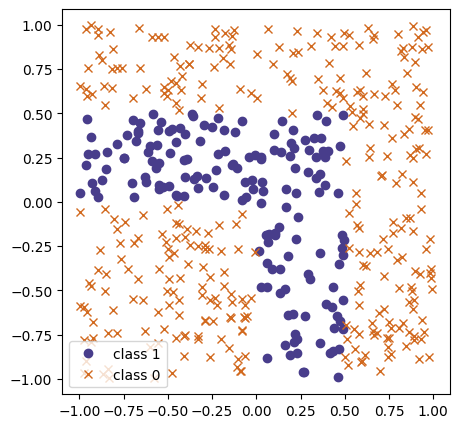

In [ ]:
## This code below generates two x values and a y value according to different patterns
## It also creates a "bias" term (a vector of 1s)
## The goal is then to learn the mapping from x to y using a neural network via back-propagation

num_obs = 500
x_mat_1 = np.random.uniform(-1,1,size = (num_obs,2))
x_mat_bias = np.ones((num_obs,1))
x_mat_full = np.concatenate( (x_mat_1,x_mat_bias), axis=1)

# PICK ONE PATTERN BELOW and comment out the rest.

# # Circle pattern
#y = (np.sqrt(x_mat_full[:,0]**2 + x_mat_full[:,1]**2)<.75).astype(int)

# # Diamond Pattern
#y = ((np.abs(x_mat_full[:,0]) + np.abs(x_mat_full[:,1]))<1).astype(int)

# # Centered square
#y = ((np.maximum(np.abs(x_mat_full[:,0]), np.abs(x_mat_full[:,1])))<.5).astype(int)

# # Thick Right Angle pattern
#y = (((np.maximum((x_mat_full[:,0]), (x_mat_full[:,1])))<.5) & ((np.maximum((x_mat_full[:,0]), (x_mat_full[:,1])))>-.5)).astype(int)

# # Thin right angle pattern
y = (((np.maximum((x_mat_full[:,0]), (x_mat_full[:,1])))<.5) & ((np.maximum((x_mat_full[:,0]), (x_mat_full[:,1])))>0)).astype(int)

print('shape of x_mat_full is {}'.format(x_mat_full.shape))
print('shape of y is {}'.format(y.shape))

fig, ax = plt.subplots(figsize=(5, 5))
ax.plot(x_mat_full[y==1, 0],x_mat_full[y==1, 1], 'ro', label='class 1', color='darkslateblue')
ax.plot(x_mat_full[y==0, 0],x_mat_full[y==0, 1], 'bx', label='class 0', color='chocolate')
# ax.grid(True)
ax.legend(loc='best')
ax.axis('equal');


print(x_mat_full)

### Modified Given Code

In [ ]:
def sigmoid(x):
    """
    Sigmoid function
    """
    return 1.0 / (1.0 + np.exp(-x))


def loss_fn(y_true, y_pred, eps=1e-16):
    """
    Loss function we would like to optimize (minimize)
    We are using Logarithmic Loss
    http://scikit-learn.org/stable/modules/model_evaluation.html#log-loss
    """
    y_pred = np.maximum(y_pred,eps)
    y_pred = np.minimum(y_pred,(1-eps))
    return -(np.sum(y_true * np.log(y_pred)) + np.sum((1-y_true)*np.log(1-y_pred)))/len(y_true)


def forward_pass(W1, W2):
    """
    Does a forward computation of the neural network
    Takes the input `x_mat` (global variable) and produces the output `y_pred`
    Also produces the gradient of the log loss function
    """
    global x_mat
    global y
    global num_


    # Compute the predictions
    z_2 = np.dot(x_mat, W1)
    a_2 = sigmoid(z_2)
    z_3 = np.dot(a_2, W2)
    y_pred = sigmoid(z_3).reshape((len(x_mat),))

    # Compute the gradient
    J_z_3_grad = -y + y_pred
    J_W_2_grad = np.dot(a_2.T, J_z_3_grad.reshape(-1, 1))
    a_2_z_2_grad = sigmoid(z_2) * (1 - sigmoid(z_2))
    J_W_1_grad = np.dot(x_mat.T, np.dot(J_z_3_grad.reshape(-1, 1), W2.T) * a_2_z_2_grad)
    gradient = (J_W_1_grad, J_W_2_grad)

    return y_pred, gradient


def plot_loss_accuracy(loss_vals, accuracies):
    fig = plt.figure(figsize=(16, 8))
    fig.suptitle('Log Loss and Accuracy over iterations')

    ax = fig.add_subplot(1, 2, 1)
    ax.plot(loss_vals)
    ax.grid(True)
    ax.set(xlabel='iterations', title='Log Loss')

    ax = fig.add_subplot(1, 2, 2)
    ax.plot(accuracies)
    ax.grid(True)
    ax.set(xlabel='iterations', title='Accuracy');

### Complete the pseudocode below

Iteration 200: Loss = 0.47322542377999693, Accuracy = 0.772
Iteration 400: Loss = 0.2414336753657884, Accuracy = 0.908
Iteration 600: Loss = 0.14001189098054442, Accuracy = 0.954
Iteration 800: Loss = 0.09335811274784105, Accuracy = 0.972
Iteration 1000: Loss = 0.08106995543562777, Accuracy = 0.974


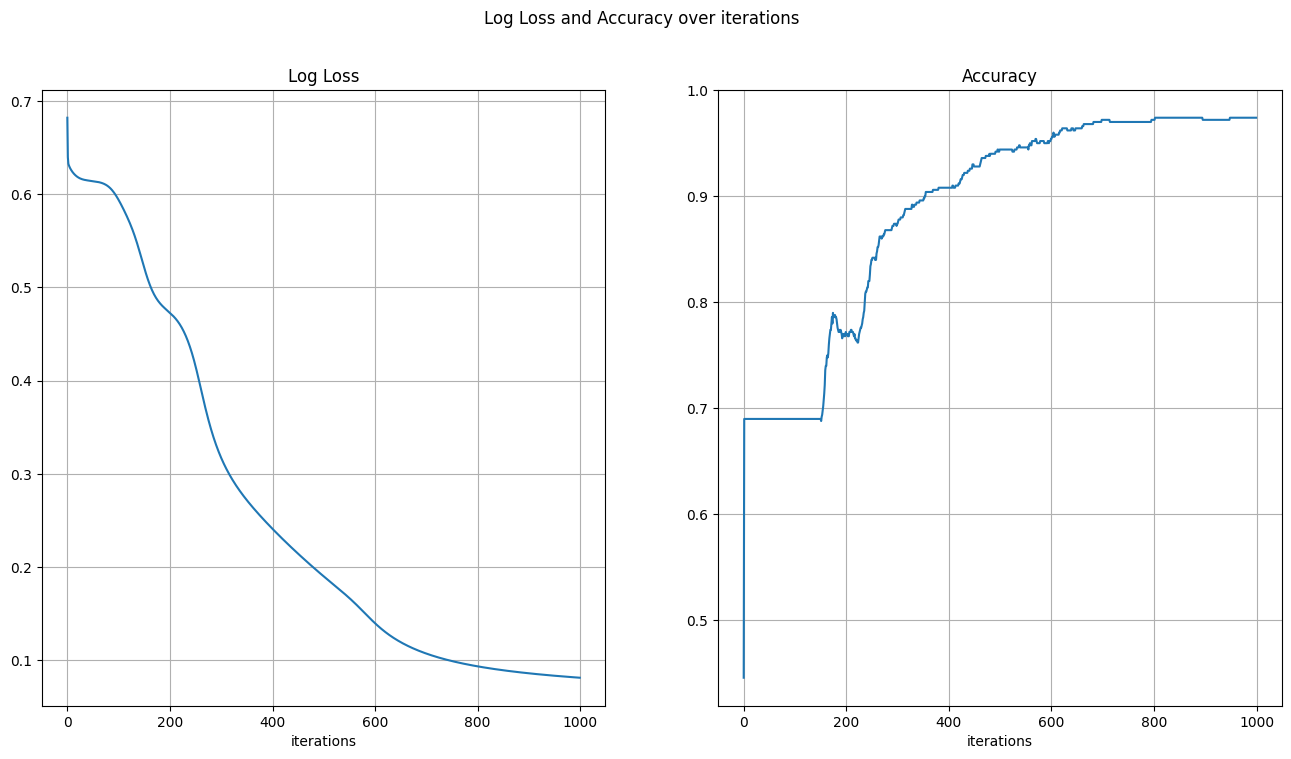

In [ ]:
np.random.seed(1)

#weights
W_1 = np.random.uniform(-1, 1, size=(3, 4))
W_2 = np.random.uniform(-1, 1, size=(4, 1))

#epoch
num_iter = 1000
#learning rate
learning_rate = 0.01

#inputs
x_mat = x_mat_full


loss_vals, accuracies = [], []

for i in range(num_iter):
    # Forward pass and gradient computation
    y_pred, gradient = forward_pass(W_1, W_2)

    # Update the weight matrices
    W_1 -= learning_rate * gradient[0]
    W_2 -= learning_rate * gradient[1]

    # Compute loss and accuracy
    loss = loss_fn(y, y_pred)
    accuracy = np.mean((y_pred > 0.5) == y)
    loss_vals.append(loss)
    accuracies.append(accuracy)

    # Print loss and accuracy for every 200th iteration
    if (i + 1) % 200 == 0:
        print(f"Iteration {i + 1}: Loss = {loss}, Accuracy = {accuracy}")

# Plot loss and accuracy over iterations
plot_loss_accuracy(loss_vals, accuracies)

References used:

https://becominghuman.ai/understanding-neural-networks-2-the-math-of-neural-networks-in-3-equations-6085fd3f09df

Plot the predicted answers, with mistakes in yellow

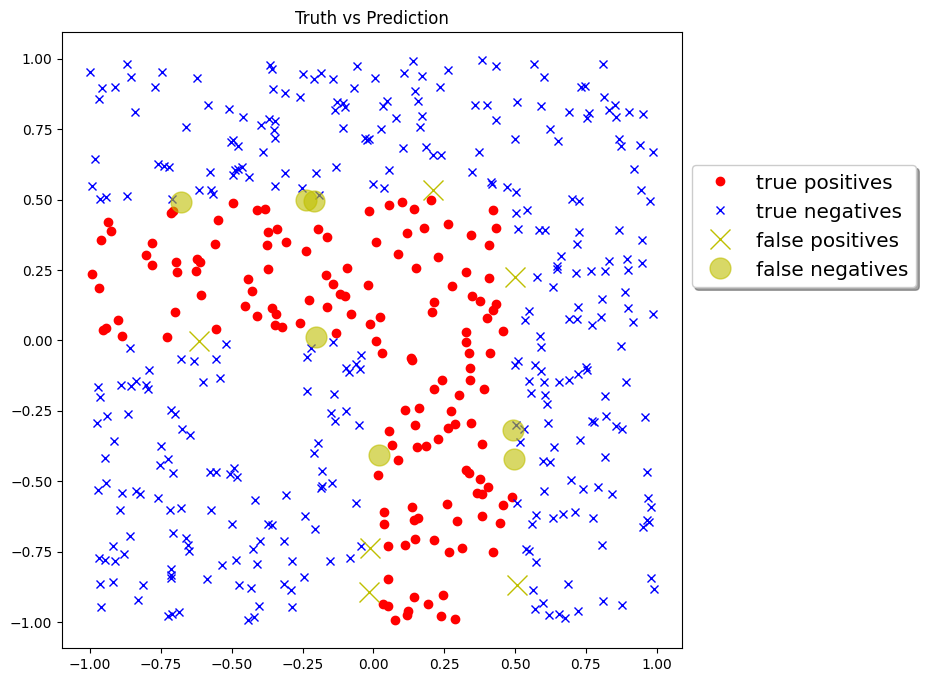

In [ ]:
pred1 = (y_pred>=.5)
pred0 = (y_pred<.5)

fig, ax = plt.subplots(figsize=(8, 8))
# true predictions
ax.plot(x_mat[pred1 & (y==1),0],x_mat[pred1 & (y==1),1], 'ro', label='true positives')
ax.plot(x_mat[pred0 & (y==0),0],x_mat[pred0 & (y==0),1], 'bx', label='true negatives')
# false predictions
ax.plot(x_mat[pred1 & (y==0),0],x_mat[pred1 & (y==0),1], 'yx', label='false positives', markersize=15)
ax.plot(x_mat[pred0 & (y==1),0],x_mat[pred0 & (y==1),1], 'yo', label='false negatives', markersize=15, alpha=.6)
ax.set(title='Truth vs Prediction')
ax.legend(bbox_to_anchor=(1, 0.8), fancybox=True, shadow=True, fontsize='x-large');

### <font Color= 'blue'>**Answers to the questions:**




#### Which patterns was the neural network able to learn quickly and which took longer?<br>

- The following immages are the loss and accuracy of each patterns after 1000 iterations with a learning rate of 0.01:



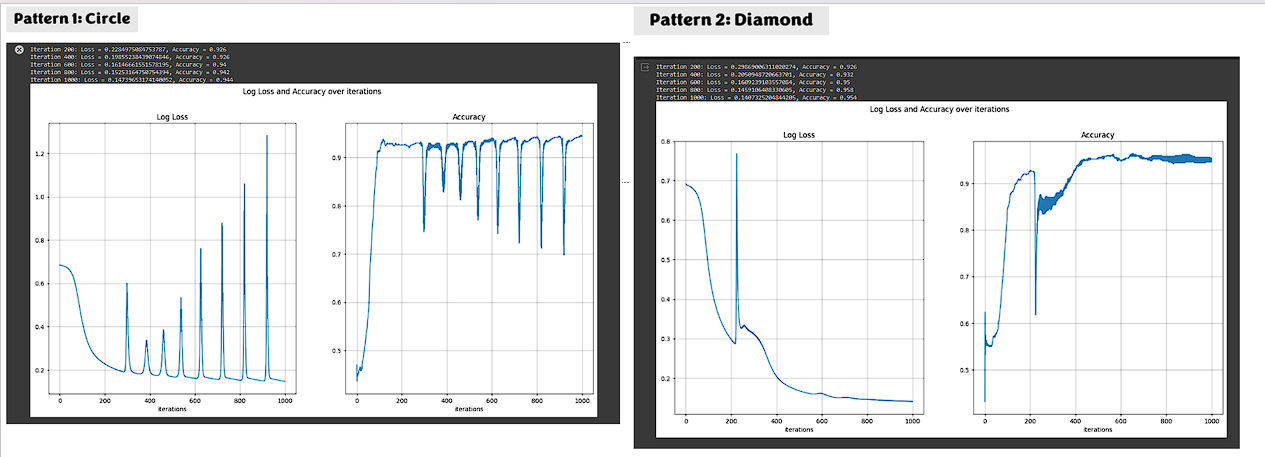

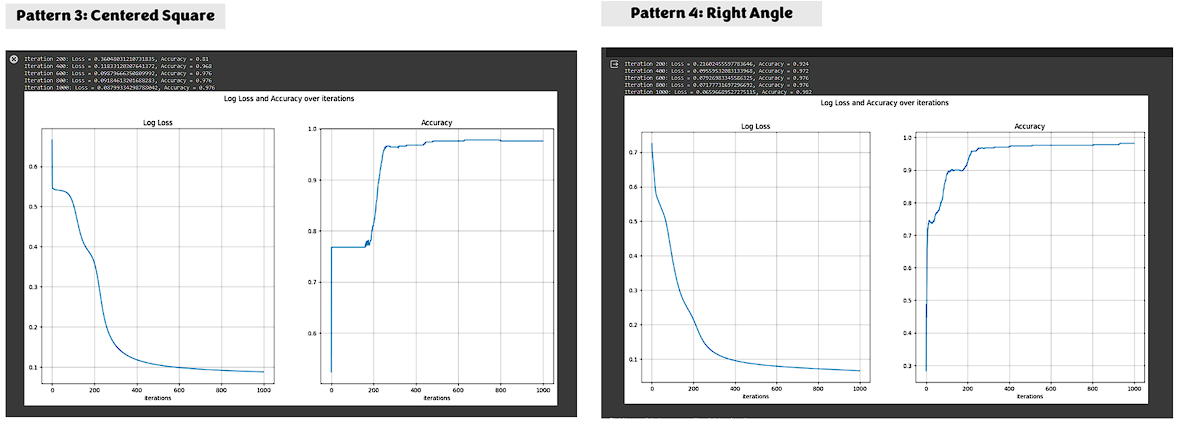

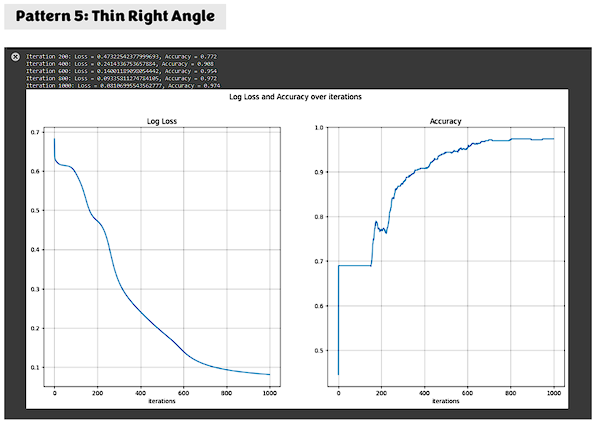

In the graphs shown above, it can be seen that the **Thick Right Angle** pattern has the best quickest decrease in loss and quickest increase in accuracy. On the other hand, the **thin right angle** has the slowest decrease in loss and slowest increase accuracy.

Diamond and circle patterns have encountered some spikes thus, I did not conclude that one of them is the fastest.

The centered square on the other hand, has also a fast decrease of loss and fast increase in accuracy. The reason that could have affected the result of this is the random value that is generated in the code. Complexity wise, the pattern of centered square is relatively easier than the right angle. Thus I can only conclude that this might be the initial weight that was randomly generated along with the inputs.





#### What learning rates and numbers of iterations worked well?



- Upon testing, the best learning rate that gave me the best results are around 0.01 to 0.001. Depeneding on the complexity or pattern used, the ideal learning rate differs. The same goes with the number of iterations. The number of iterations in this activity started with 1000. I tested it by altering it with various numbers ranging from 300 to 2000. I found by testing that if the loss is continuous while the accuracy goes higher, I would go for more iterations as long as it won't result to overfitting.



## Supplementary Activity

1. Use a different weights , input and activation function
2. Apply feedforward and backpropagation
3. Plot the loss and accuracy for every 300th iteration


### Task 1:
Use a different weights , input and activation function

In [ ]:
import numpy as np

np.random.seed(20) #random

#generating random inputs
num_obs = 500
x_mat_1 = np.random.uniform(-1,1,size = (num_obs,2))
x_mat_bias = np.ones((num_obs,1))
x_mat_full = np.concatenate( (x_mat_1,x_mat_bias), axis=1)

#generating random weights
W_1 = np.random.uniform(-1, 1, size=(3, 4))
W_2 = np.random.uniform(-1, 1, size=(4, 1))

#epoch
num_iter = 2000

#learning rate
learning_rate = 0.001


# Thick Right Angle Pattern
y = (((np.maximum((x_mat_full[:,0]), (x_mat_full[:,1])))<.5) & ((np.maximum((x_mat_full[:,0]), (x_mat_full[:,1])))>-.5)).astype(int)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#New Activation Function
def ReLu(x):
    return np.maximum(0, x)

def loss_fn(y_true, y_pred, eps=1e-16):
    """
    Loss function we would like to optimize (minimize)
    We are using Logarithmic Loss
    http://scikit-learn.org/stable/modules/model_evaluation.html#log-loss
    """
    y_pred = np.maximum(y_pred, eps)
    y_pred = np.minimum(y_pred, (1 - eps))
    return -(np.sum(y_true * np.log(y_pred)) + np.sum((1 - y_true) * np.log(1 - y_pred))) / len(y_true)

def forward_pass(W1, W2):
    """
    Does a forward computation of the neural network
    Takes the input `x_mat_full` and produces the output `y_pred`
    Also produces the gradient of the log loss function
    """
    global x_mat_full
    global y

    # Compute the predictions
    z_2 = np.dot(x_mat_full, W1)
    a_2 = ReLu(z_2)
    z_3 = np.dot(a_2, W2)
    y_pred = ReLu(z_3).reshape((len(x_mat_full),))

    # Compute the gradient
    J_z_3_grad = -y + y_pred
    J_W_2_grad = np.dot(a_2.T, J_z_3_grad.reshape(-1, 1))                                      # Gradient of the loss with respect to W_2
    a_2_z_2_grad = np.where(z_2 > 0, 1, 0)                                                     # Derivative of ReLu
    J_W_1_grad = np.dot(x_mat_full.T, np.dot(J_z_3_grad.reshape(-1, 1), W2.T) * a_2_z_2_grad)
    gradient = (J_W_1_grad, J_W_2_grad)

    return y_pred, gradient

def plot_loss_accuracy(loss_vals, accuracies):
    fig = plt.figure(figsize=(16, 8))
    fig.suptitle('Log Loss and Accuracy over iterations')

    ax = fig.add_subplot(1, 2, 1)
    ax.plot(loss_vals)
    ax.grid(True)
    ax.set(xlabel='iterations', title='Log Loss')

    ax = fig.add_subplot(1, 2, 2)
    ax.plot(accuracies)
    ax.grid(True)
    ax.set(xlabel='iterations', title='Accuracy')


### Task 2:
Apply feedforward and backpropagation

In [ ]:
loss_vals, accuracies = [], []

for i in range(num_iter):
    # Forward pass and gradient computation
    y_pred, gradient = forward_pass(W_1, W_2)

    # Update the weight matrices
    W_1 -= learning_rate * gradient[0]
    W_2 -= learning_rate * gradient[1]

    # Compute loss and accuracy
    loss = loss_fn(y, y_pred)
    accuracy = np.mean((y_pred > 0.5) == y)
    loss_vals.append(loss)
    accuracies.append(accuracy)

    # Print loss and accuracy for every 200th iteration
    if (i + 1) % 300 == 0:
        print(f"Iteration {i + 1}: Loss = {loss}, Accuracy = {accuracy}")


Iteration 300: Loss = 0.27274136368864355, Accuracy = 0.91
Iteration 600: Loss = 0.21933259909116284, Accuracy = 0.946
Iteration 900: Loss = 0.21727531786780846, Accuracy = 0.948
Iteration 1200: Loss = 0.2165656226494705, Accuracy = 0.948
Iteration 1500: Loss = 0.21643132828165698, Accuracy = 0.948
Iteration 1800: Loss = 0.21636961165221805, Accuracy = 0.948


### Task 3:


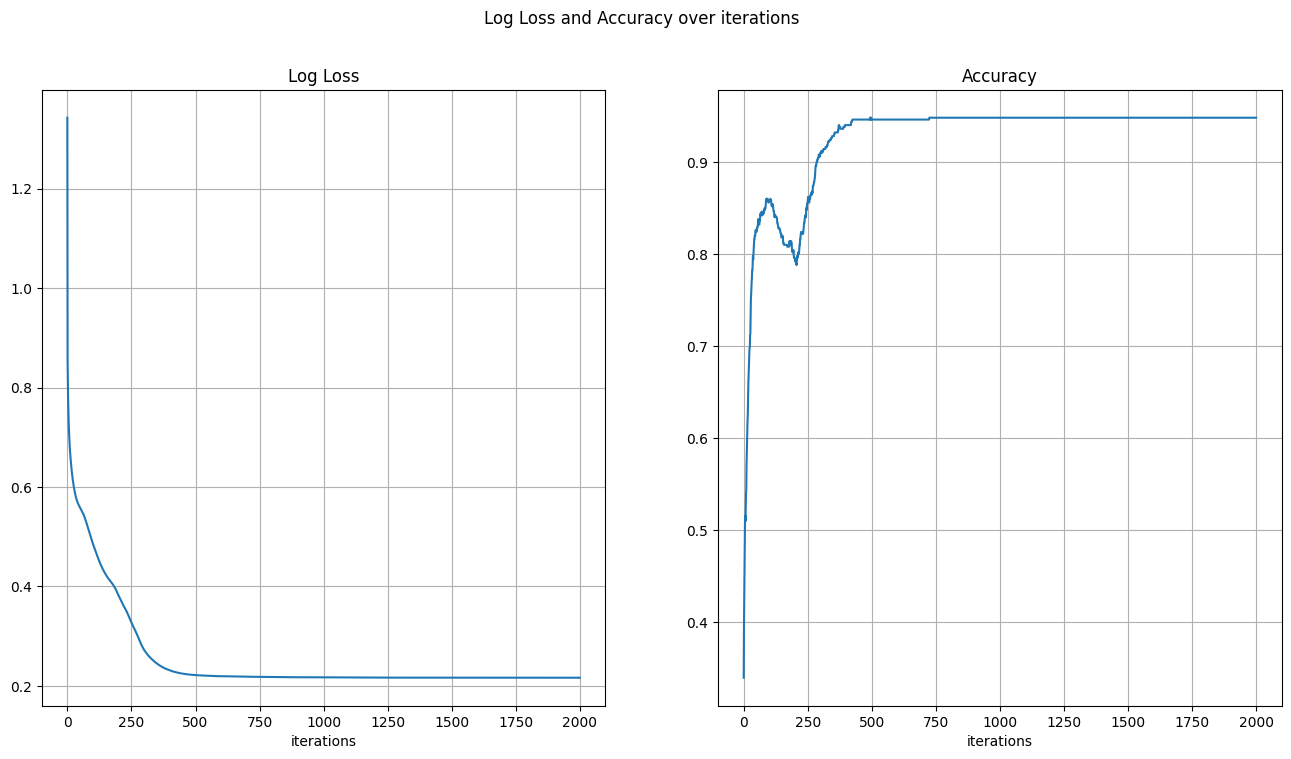

In [ ]:
# Plot loss and accuracy over iterations
plot_loss_accuracy(loss_vals, accuracies)

<font color = 'red'> **Remarks:** <font>

The main challenge in this code is creating the computation for the gradient. Since the gradient used in the given code is for sigmoid function, I have to adjust the code and understand how I can translate the gradient loss and derivative of ReLU.



```
J_W_2_grad = np.dot(a_2.T, J_z_3_grad.reshape(-1, 1))            # Gradient of the loss with respect to W_2                          
a_2_z_2_grad = np.where(z_2 > 0, 1 0)                            # Derivative of ReLu
```

<br>                                          

The task also asked to have code also use different weights and inputs. What I did is that I also randomly generated it. For the y value, I used the thick right angle pattern.


```
# Thick Right Angle Pattern
y = (((np.maximum((x_mat_full[:,0]), (x_mat_full[:,1])))<.5) & ((np.maximum((x_mat_full[:,0]), (x_mat_full[:,1])))>-.5)).astype(int)
```


<br>

In the graphs, Log Loss and Accuracy trend is better compared to the previous results. It can be concluded from this that the activation function of code affects how the loss and accuracy of the model would be.




### Conclusion

After conducting the activity I was able to learn and conclude the following things:

1. Creating the activation function needs an understanding how their formulas work in order to create a function for it and when and how to use it.

2. Neurons as boolean logic gates helped me understand how the weights and bias of an equation would affect the output.

3. Feedforward networks are computed layer by layer by multiplying the input to the weight and then applying an activation function until it goes to the final layer or output layer

4. In order to appreciate the backpropagation, it is a must to understand how it works first.
  - create a forward pass
  - compute for loss
  - Backward pass
    - Computing the output layer gradient
    - Compute for the back propagation error
    - Computing for parameter gradients
    - Updating the parameters
  - Gradient deescent
  - Repeat the proccess

5. There is no standard for the best learning rates, iteration and activation functions. Each cases would be different depending on the dataset that you have.
